In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.dbf
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.prj
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.shp
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.cpg
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.prj
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.cpg
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.shx
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.shx
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.shp
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.dbf


In [2]:
import numpy as np # álgebra linear
import pandas as pd # processamento de dados
import geopandas as gpd # geoprocessamento

import matplotlib.colors as colors # para definição de cores personalizadas
import matplotlib.pyplot as plt # biblioteca gráfica para visualizarmos os plots

import os

# escolas = pd.read_csv('/kaggle/input/censo-2020-escolas/escolas_selecionadas.CSV')
shape_estados = gpd.read_file('/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.shp')
shape_municipios = gpd.read_file('/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.shp')

# escolas.head()
shape_municipios.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [3]:
sergipe_municipios = shape_municipios[ shape_municipios['SIGLA_UF'] == 'AL']
sergipe_municipios.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
1650,2700102,Água Branca,AL,468.229,"POLYGON ((-37.95164 -9.09743, -37.88934 -9.162..."
1651,2700201,Anadia,AL,186.134,"POLYGON ((-36.34926 -9.59310, -36.34920 -9.593..."
1652,2700300,Arapiraca,AL,345.655,"POLYGON ((-36.66005 -9.64201, -36.66002 -9.642..."
1653,2700409,Atalaia,AL,533.258,"POLYGON ((-35.92889 -9.37557, -35.93043 -9.441..."
1654,2700508,Barra de Santo Antônio,AL,131.364,"POLYGON ((-35.50117 -9.32811, -35.48203 -9.348..."


<AxesSubplot:>

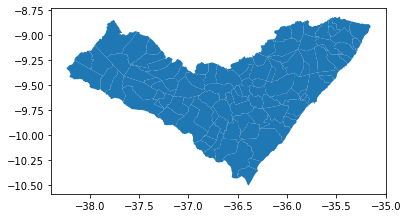

In [4]:
sergipe_municipios.plot()

# # Mostra a densidade
# shape_municipios.plot(column='densidade', cmap='Blues', norm=divnorm, edgecolor='#9fe1a1',
#                       linewidth=0.1, figsize=(12, 8))

## Renan Calheiro - Web Scrapping

In [5]:
url = 'https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-alagoas/senador-candidato-renan/'

In [6]:
import requests
!pip install bs4
from bs4 import BeautifulSoup

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=dacdccb91da9917093cd18918d92c4fc1ab0bd3759ed90b3a4a9c72c3f4a2eac
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [7]:
website_url = requests.get(url).text
soup = BeautifulSoup(website_url,'html.parser')

In [8]:
data_point = soup.find('table', attrs = {'class': 'table table-resultados sans-serif'})
data_point

<table class="table table-resultados sans-serif">
<thead>
<tr>
<th>Município</th>
<th class="text-right">1º turno</th>
</tr>
</thead>
<tbody>
<tr>
<td class="candidato">
<a class="clearfix" href="https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-alagoas/olho-d-agua-grande-al/senador/">
<div class="nome-partido">
<h2 class="nome">
        							Olho d'Água Grande        						</h2>
</div>
</a>
</td>
<td class="votos">
<span class="porcentagem">
        					44,29%        				</span>
<span class="qtd-votos">2.559 votos</span>
</td>
</tr>
<tr>
<td class="candidato">
<a class="clearfix" href="https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-alagoas/olho-d-agua-do-casado-al/senador/">
<div class="nome-partido">
<h2 class="nome">
        							Olho d'Água do Casado        						</h2>
</div>
</a>
</td>
<td class="votos">
<span class="porcentagem">
        					43,28%        				</span>
<span class="qtd-votos">3.372 votos</span>
</td>
</tr>
<t

In [9]:
# <!-- 
# <tr>
# <td class="candidato">
#     <a class="clearfix" href="https://especiais.gazetadopovo.com.br/eleicoes/2018/resultados/municipios-alagoas/olho-d-agua-grande-al/senador/">
#         <div class="nome-partido">
#             <h2 class="nome">
#                 Olho d'Água Grande        						</h2>
#         </div>
#     </a>
# </td>
# <td class="votos">
#     <span class="porcentagem">
#         44,29%        				</span>
#     <span class="qtd-votos">2.559 votos</span>
# </td>
#                 </tr> -->

In [10]:
alist = []

def clean_text(astring):
#     print(astring)
    return astring.replace('\t','').replace('\n','').replace('  ','')

city_vote = data_point.findAll('tr')

for city in city_vote[1:]:
#     print(city)
    name = clean_text( city.find('h2').get_text() )
    percent = float(clean_text( city.find('span', attrs = {'class': 'porcentagem'}).get_text() ).replace(',','.').replace('%',''))
    votes = int(clean_text( city.find('span', attrs = {'class': 'qtd-votos'}).get_text() ).replace(' votos','').replace('.',''))
    arow = (name, percent, votes)
    alist.append(arow)
#     print(arow)
#     break
    
adf = pd.DataFrame.from_records(alist, columns = ['Cidade','Porcentagem da cidade','Qtd Votos'])

In [11]:
adf.head()

,Cidade,Porcentagem da cidade,Qtd Votos
0,Olho d'Água Grande,44.29,2559
1,Olho d'Água do Casado,43.28,3372
2,São Brás,42.84,3094
3,Mata Grande,42.64,8226
4,Cacimbinhas,40.96,4188


## Join Data and Geo Map

In [12]:
# NM_MUN

In [13]:
def check_diff_between_2_columns_df(df1, col1, name1, df2, col2, name2):
    # Varis vezes que tenho que juntar um mapa com informaçao do mapa, o nome nao bate
    # essa funçao serve para mostra o que tem em um df e nao tem no outro e asism corrigir diferneça de nomes
    
    df_merge = df1.merge(df2, left_on=col1, right_on=col2, how='right')
    df_merge[col1] = df_merge[col1].fillna('missing')
    
    # list names of df1
    df1_list = df1[col1].tolist()
    df1_list.sort()
    
    # list names of df2
    df2_list = df2[col2].tolist()
    df2_list.sort()
    
    data_in_df1_not_in_df2 = []
    for d2 in df2_list:
        if(d2 not in df1_list):
            data_in_df1_not_in_df2.append(d2)

    data_in_df2_not_in_df1 = []
    for d1 in df1_list:
        if(d1 not in df2_list):
            data_in_df2_not_in_df1.append(d1)

    
    
    if(data_in_df2_not_in_df1 == [] and data_in_df1_not_in_df2 == []):
        print('The 2 dataframe has the columns with the same data')
    else:
        print('\nHas in ', name1 ,' but NOT IN ', name2 ,' (SHOW ', name1 ,'):\n', data_in_df1_not_in_df2)
        print('\nHas in ', name2,' but NOT IN ', name1,' (SHOW ', name2,'):\n', data_in_df2_not_in_df1)

In [14]:
check_diff_between_2_columns_df(adf, 'Cidade', 'INFO_VOTOS', sergipe_municipios, 'NM_MUN', 'SHAPE_MAP')

The 2 dataframe has the columns with the same data


## Join

In [15]:
adf.count()

Cidade                   102
Porcentagem da cidade    102
Qtd Votos                102
dtype: int64

In [16]:
df_join = adf.merge(sergipe_municipios, left_on='Cidade', right_on='NM_MUN', how='left')
df_join

,Cidade,Porcentagem da cidade,Qtd Votos,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,Olho d'Água Grande,44.29,2559,2705903,Olho d'Água Grande,AL,117.006,"POLYGON ((-36.81586 -10.00598, -36.81470 -10.0..."
1,Olho d'Água do Casado,43.28,3372,2705804,Olho d'Água do Casado,AL,327.678,"POLYGON ((-37.76882 -9.28878, -37.74389 -9.314..."
2,São Brás,42.84,3094,2708204,São Brás,AL,139.038,"POLYGON ((-36.87412 -10.05476, -36.87236 -10.0..."
3,Mata Grande,42.64,8226,2705002,Mata Grande,AL,914.722,"POLYGON ((-37.75222 -8.85316, -37.75111 -8.855..."
4,Cacimbinhas,40.96,4188,2701209,Cacimbinhas,AL,281.692,"POLYGON ((-36.96929 -9.36905, -36.96129 -9.375..."
...,...,...,...,...,...,...,...,...
97,Limoeiro de Anadia,18.26,3617,2704203,Limoeiro de Anadia,AL,309.205,"POLYGON ((-36.37299 -9.68991, -36.37286 -9.690..."
98,Olho d'Água das Flores,17.86,3227,2705705,Olho d'Água das Flores,AL,191.656,"POLYGON ((-37.22792 -9.51949, -37.18735 -9.561..."
99,Maceió,14.61,106693,2704302,Maceió,AL,509.320,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
100,Roteiro,12.70,773,2707800,Roteiro,AL,128.926,"POLYGON ((-36.01485 -9.80817, -36.01421 -9.809..."


## Show Map

AttributeError: 'Line2D' object has no property 'column'

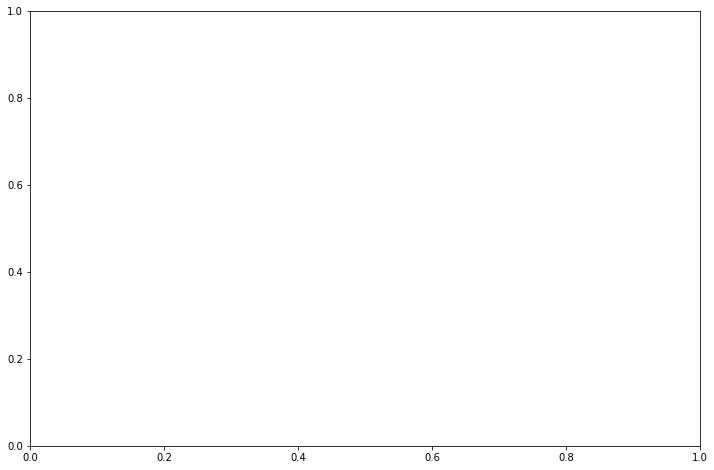

In [17]:
divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=0.009, vmax=0.08)

df_join.plot(column='Qtd Votos', cmap='Blues', norm=divnorm, edgecolor='#9fe1a1',
                      linewidth=0.1, figsize=(12, 8))

# Desativa eixo e mostra mapa
plt.axis('off')
plt.show()

In [ ]:
from geopandas import GeoDataFrame

df_join = GeoDataFrame(df_join)

df_join.plot(column='Qtd Votos', cmap='Blues', norm=divnorm, edgecolor='#9fe1a1',
                      linewidth=0.1, figsize=(12, 8))

# Desativa eixo e mostra mapa
plt.axis('off')
plt.show()

In [ ]:
df_join

In [ ]:
df_join.plot(column='Porcentagem da cidade', cmap='Blues', edgecolor='#9fe1a1',
                      linewidth=0.1, figsize=(12, 8))

# Desativa eixo e mostra mapa
plt.axis('off')
plt.show()

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.tools import HoverTool
from bokeh.models import GeoJSONDataSource
from bokeh.layouts import row
output_notebook()


from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import LinearColorMapper, HoverTool, ColorBar
from bokeh.palettes import magma,viridis,cividis, inferno
from bokeh.models import WheelZoomTool, BoxZoomTool, ResetTool

def eda_us_states_geo_plot(geosource, df_in, title, column, state_column, low = -1, high = -1, palette = -1, plot_width=500):
    """
    Generate Bokeh Plot to Brazil States:
        geosource: GeoJSONDataSource of Bokeh
        df_in: DataSet before transformed in GeoJSONDataSource
        title: title of plot
        column: column of df_in to be placed values in geoplot
        state_column: indicate column with names of States
        low = (optional) min value of range of color spectre
        high = (optional) max values of range of color spectre
        palette: (optional) can be magma, viridis, civis, inferno e etc.. (with number os colors)
            Example: cividis(8) (8 colors to classify), cividis(256)  (256, more colors to clasify)
    """
    if high == -1:
        high = max(df_in[column])
    if low == -1:
        low = min(df_in[column])
    if palette == -1:
        palette = inferno(24)
        
    palette = palette[::-1]
    color_mapper = LinearColorMapper(palette = palette, low = low, high = high)
    
    hover = HoverTool(tooltips = [ ('Cidade','@{'+'Cidade'+'}'), (column, '@{'+column+'}{%.2f}')],
                  formatters={'@{'+column+'}' : 'printf'})

    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width = 450, height = 20, 
                         border_line_color=None, location = (0,0),  orientation = 'horizontal')

    p = figure(title = title, plot_height = 400, plot_width = plot_width, tools = [hover])

    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    p.xaxis.visible = False
    p.yaxis.visible = False

    p.patches('xs','ys', source = geosource, line_color = 'black', line_width = 0.25,
              fill_alpha = 1, fill_color = {'field' : str(column), 'transform' : color_mapper})

    p.add_layout(color_bar, 'below')
    p.add_tools(WheelZoomTool())
    p.add_tools(ResetTool())
    return p   

from bokeh.palettes import Turbo256 
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import magma,viridis,cividis, inferno

def eda_bokeh_horiz_bar_ranked(df, column_target, title = '', int_top = 3, second_target = 'NM_MUN'):
    """
    Generate Bokeh Plot ranking top fists and last value:
        df: data_frame
        column_targe: a column of df inputed
        title: title of plot
        int_top: number of the tops
        column: column of df_in to be placed values in geoplot
        second_targe = 'state'
    """
    ranked = df.sort_values(by=column_target, ascending=False).reset_index(drop = True)
    ranked = ranked.dropna()
    top_int = int_top
    # top = ranked[:top_int].append(ranked[-top_int:]) # Bottom an Top
    top = ranked[:top_int+top_int]# only Top
    top.index = top.index + 1
    source = ColumnDataSource(data=top)
#     print('second_target', second_target, '|', source.data)
    list_second_target = source.data[second_target].tolist()
    index_label = list_second_target[::-1] # reverse order label

    p = figure(plot_width=500, plot_height=400, y_range=index_label, 
                toolbar_location=None, title=title)   

    p.hbar(y=second_target, right=column_target, source=source, height=0.85, line_color="#000000",
          fill_color=factor_cmap(second_target, palette=inferno(24), factors=list_second_target))
    p.x_range.start = 0  # start value of the x-axis

    p.xaxis.axis_label = "value of '" + column_target + "'"

    hover = HoverTool()  # initiate hover tool
    hover.tooltips = [("Value","@{" + column_target + "}{%.2f}" ),("Ranking","@index°")]
    hover.formatters={'@{'+column_target+'}' : 'printf'}

    hover.mode = 'hline' # set the mode of the hover tool
    p.add_tools(hover)   # add the hover tooltip to the plot

    return p # show in notebook

def eda_geoplot_country_rank_plot(the_df, primary_column, target_column, first_title, second_title, int_top = 10,
                                  location_column = 'NM_MUN', ):
    """
    Execute and show all together:
    @ primary_columns must to be a float to join to make a GeoSource
    generate_GeoJSONSource_to_districts()
    eda_seoul_districts_geo_plot()
    eda_bokeh_horiz_bar_ranked()
    """
    the_df = the_df.rename({primary_column: target_column}, axis = 1)

    geo_source = generate_GeoJSONSource(the_df)

    geo = eda_us_states_geo_plot(geo_source, the_df, first_title,
                                       target_column, location_column, palette = inferno(32))

    # rank 8 bottom and Up
    rank = eda_bokeh_horiz_bar_ranked(the_df, target_column, second_title,
                                      int_top = int_top, second_target = 'Cidade')

    show( row( geo, rank ))

In [ ]:
from bokeh.models import GeoJSONDataSource
def generate_GeoJSONSource(my_df):
    global sergipe_municipios
    geojson = sergipe_municipios
    geo_source_merged = geojson.merge(my_df, left_on = 'NM_MUN', right_on = 'Cidade')
    return GeoJSONDataSource( geojson = geo_source_merged.to_json())

In [ ]:
primary_col = 'Porcentagem da cidade'

df_aux = adf

eda_geoplot_country_rank_plot(df_aux, primary_col, primary_col,
                           "Total Gold Medal in World", "The Top 20 Countries in Gold Medal")

In [ ]:
primary_col = 'Qtd Votos'

df_aux = adf

eda_geoplot_country_rank_plot(df_aux, primary_col, primary_col,
                           "Total Gold Medal in World", "The Top 20 Countries in Gold Medal")

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
# df = px.data.tips()
fig = px.pie(adf, values='Qtd Votos', names='Cidade')
fig.show()

In [ ]:
total = adf['Qtd Votos'].sum()

adf['Percent Total'] = adf['Qtd Votos'] / total

In [ ]:
# qual foi o lugar mais impritante para a vitoria dele
primary_col = 'Percent Total'

df_aux = adf

eda_geoplot_country_rank_plot(df_aux, primary_col, primary_col,
                           "Total Gold Medal in World", "The Top 20 Countries in Gold Medal")

In [ ]:
# qual lugar pode ignorar

adf['ant Percent Total'] = 1 - adf['Percent Total']

# qual foi o lugar mais impritante para a vitoria dele
primary_col = 'ant Percent Total'

df_aux = adf

eda_geoplot_country_rank_plot(df_aux, primary_col, primary_col,
                           "Total Gold Medal in World", "The Top 20 Countries in Gold Medal")

In [ ]:
# exclude top city

# qual lugar pode ignorar

# adf['ant Percent Total'] = 1 - adf['Percent Total']

# qual foi o lugar mais impritante para a vitoria dele
primary_col = 'Qtd Votos'

df_aux = adf.copy()
# df_aux["column1"].replace({"Ma": "x", "b": "y"}, inplace=True)

df_aux.loc[df_aux['Cidade'] == 'Maceió' ] = 0
df_aux.loc[df_aux['Cidade'] == 'Arapiraca' ] = 0

eda_geoplot_country_rank_plot(df_aux, primary_col, primary_col,
                           "Total Gold Medal in World", "The Top 20 Countries in Gold Medal")